<a href="https://colab.research.google.com/github/Anj2307/SOI_project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd # for reading the document
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [31]:
# importing the data
df=pd.read_csv("SOI_2025_Dataset.csv")

In [32]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.7,0.062288,-1,24,50,0.016740,-0.871747,AB,3430,...,1,200.0,0,INTERNET,6.804428,other,0,1,0,0
1,0,0.9,0.098433,-1,310,50,0.019002,-1.023805,AB,3492,...,1,1500.0,0,INTERNET,1.412211,macintosh,0,1,0,0
2,0,0.6,0.116962,-1,189,60,0.047064,-1.206121,AB,4621,...,0,200.0,0,INTERNET,14.488562,other,1,1,0,0
3,0,0.3,0.059078,10,40,60,0.008007,-0.075908,AA,1697,...,1,200.0,0,INTERNET,6.152497,linux,1,1,0,0
4,0,0.1,0.689959,-1,128,30,2.513544,-1.108190,AD,1431,...,0,200.0,0,INTERNET,5.599853,other,0,1,0,0


Comperision between fraud and his/her income

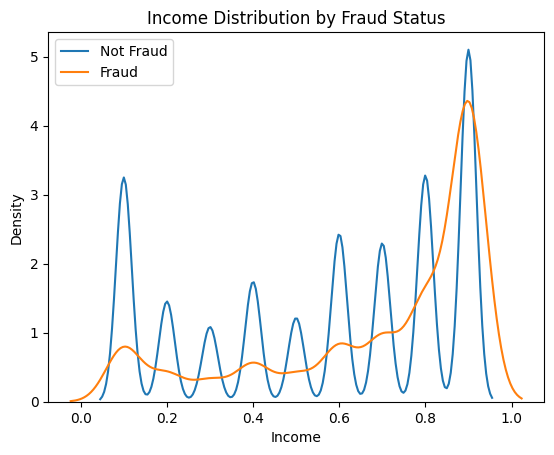

In [33]:
sns.kdeplot(df[df['fraud_bool'] == 0]['income'], label='Not Fraud')
sns.kdeplot(df[df['fraud_bool'] == 1]['income'], label='Fraud')
plt.xlabel('Income')
plt.title('Income Distribution by Fraud Status')
plt.legend()
plt.show()

In [34]:
from scipy.stats import ttest_ind

income_fraud = df[df['fraud_bool'] == 1]['income']
income_no_fraud = df[df['fraud_bool'] == 0]['income']

stat, p = ttest_ind(income_fraud, income_no_fraud, equal_var=False)
print(f"T-test statistic: {stat}, p-value: {p}")


T-test statistic: 46.310678096322185, p-value: 0.0


So above suggest that fraud income is higher.


<Axes: xlabel='fraud_bool', ylabel='intended_balcon_amount'>

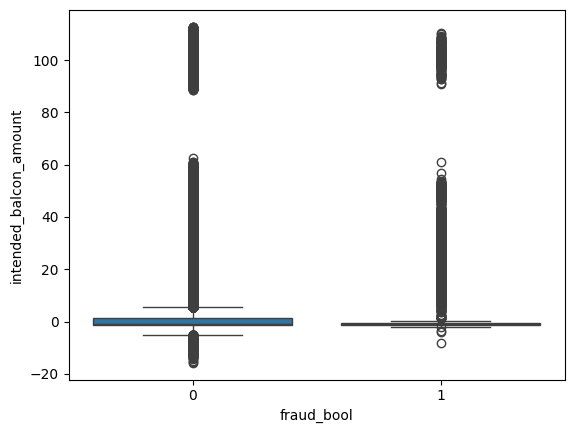

In [35]:
sns.boxplot(x='fraud_bool', y='intended_balcon_amount', data=df)


This suggests that extreme intended amounts (especially on the lower or higher ends) could be less associated with fraud in this dataset.

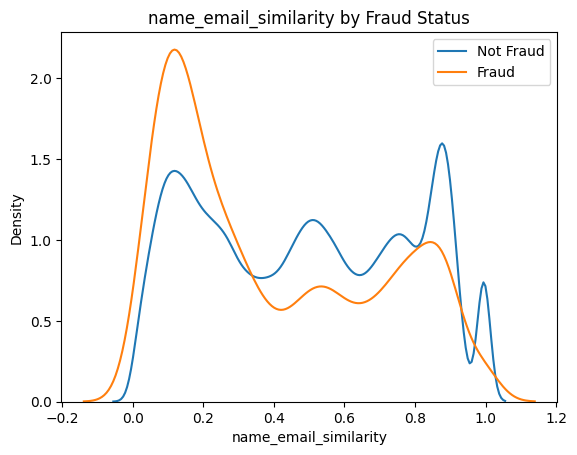

In [36]:
sns.kdeplot(df[df['fraud_bool'] == 0]['name_email_similarity'], label='Not Fraud')
sns.kdeplot(df[df['fraud_bool'] == 1]['name_email_similarity'], label='Fraud')
plt.xlabel('name_email_similarity')
plt.title('name_email_similarity by Fraud Status')
plt.legend()
plt.show()

Above graph suggested that similarity between name and email is lesser in fraud than non fraud.

Relation between address which tell how that user is stable at a single place.

In [37]:
import numpy as np

# Replace -1 with NaN (missing)
df['prev_address_months_count'] = df['prev_address_months_count'].replace(-1, np.nan)

# Optionally fill NaNs with median or 0 (your choice based on context)
df['prev_address_months_count'].fillna(df['prev_address_months_count'].median(), inplace=True)


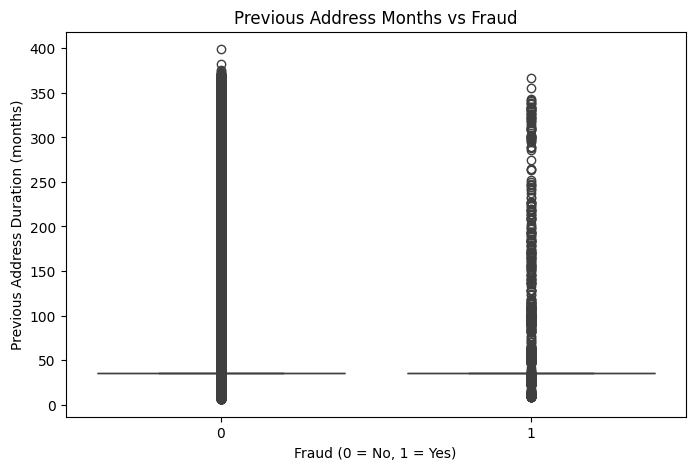

In [38]:


plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='prev_address_months_count', data=df)
plt.title('Previous Address Months vs Fraud')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Previous Address Duration (months)')
plt.show()


As we clearly see most fraudsters are instable then non fraud.

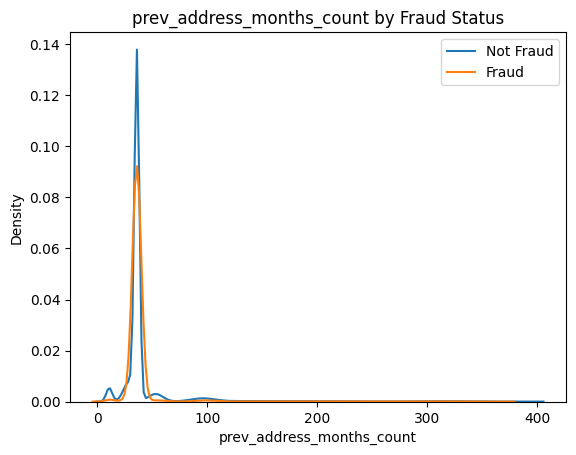

In [39]:
sns.kdeplot(df[df['fraud_bool'] == 0]['prev_address_months_count'], label='Not Fraud')
sns.kdeplot(df[df['fraud_bool'] == 1]['prev_address_months_count'], label='Fraud')
plt.xlabel('prev_address_months_count')
plt.title('prev_address_months_count by Fraud Status')
plt.legend()
plt.show()

In [40]:
df['fraud_bool'].value_counts()


,count
fraud_bool,
0,988971
1,11029


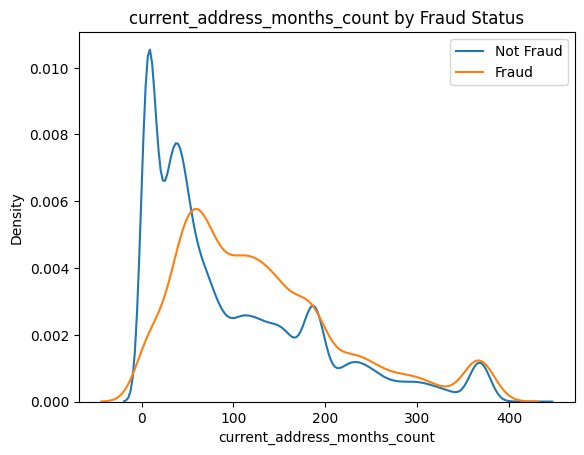

In [41]:
sns.kdeplot(df[df['fraud_bool'] == 0]['current_address_months_count'], label='Not Fraud')
sns.kdeplot(df[df['fraud_bool'] == 1]['current_address_months_count'], label='Fraud')
plt.xlabel('current_address_months_count')
plt.title('current_address_months_count by Fraud Status')
plt.legend()
plt.show()

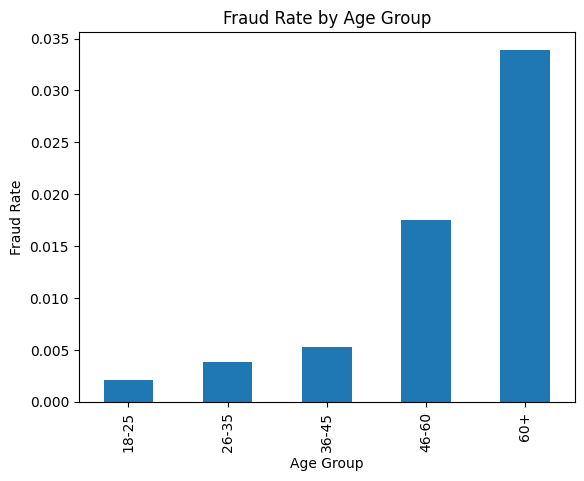

In [42]:
df['age_group'] = pd.cut(df['customer_age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25','26-35','36-45','46-60','60+'])

fraud_rate_by_age = df.groupby('age_group')['fraud_bool'].mean()

fraud_rate_by_age.plot(kind='bar', title='Fraud Rate by Age Group', ylabel='Fraud Rate', xlabel='Age Group')
plt.show()


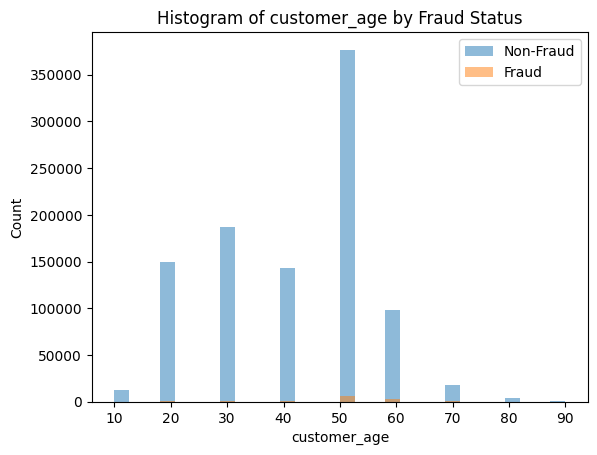

In [43]:
plt.hist(df[df['fraud_bool'] == 0]['customer_age'], bins=30, alpha=0.5, label='Non-Fraud')
plt.hist(df[df['fraud_bool'] == 1]['customer_age'], bins=30, alpha=0.5, label='Fraud')
plt.xlabel('customer_age')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of customer_age by Fraud Status')
plt.show()


Most Fraudstars are find at the age between 50-60.

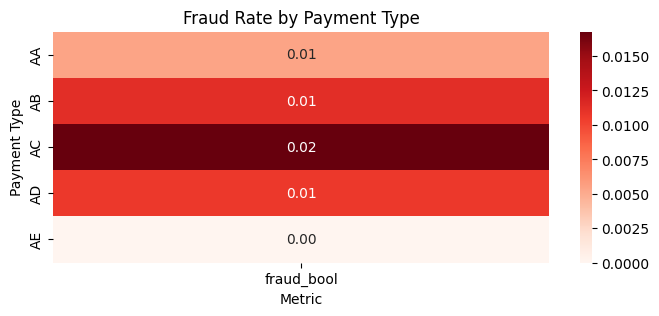

In [44]:
# Create fraud rate pivot
pivot_rate = df.groupby('payment_type')['fraud_bool'].mean().to_frame().T

# Optional: transpose if you want payment methods on x-axis
pivot_rate = pivot_rate.T

# Plot
plt.figure(figsize=(8, 3))
sns.heatmap(pivot_rate, annot=True, cmap='Reds', fmt=".2f")
plt.title('Fraud Rate by Payment Type')
plt.xlabel('Metric')
plt.ylabel('Payment Type')
plt.show()


In [46]:
df['payment_type'] = df['payment_type'].str.lower().str.strip()


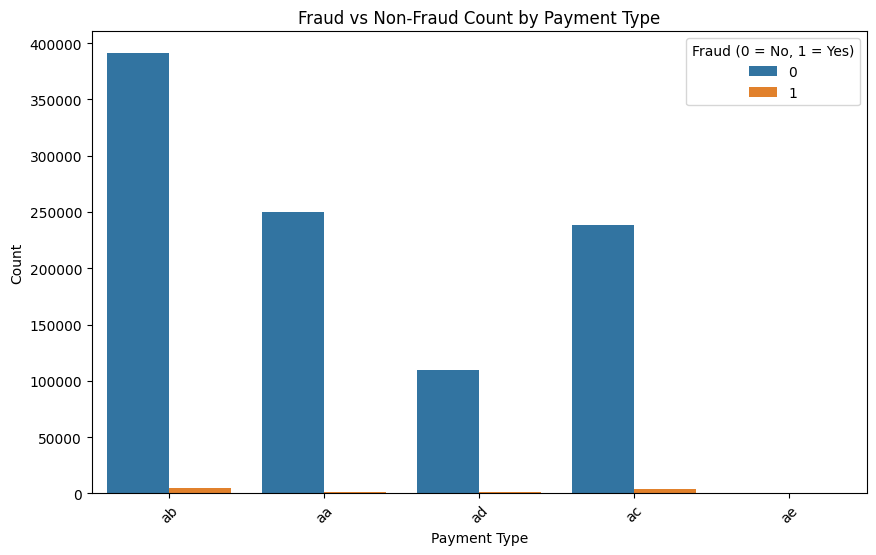

In [47]:

plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


fraudster use ac and ab payment mode most.

In [49]:
df['employment_status'] = df['employment_status'].str.lower().str.strip()

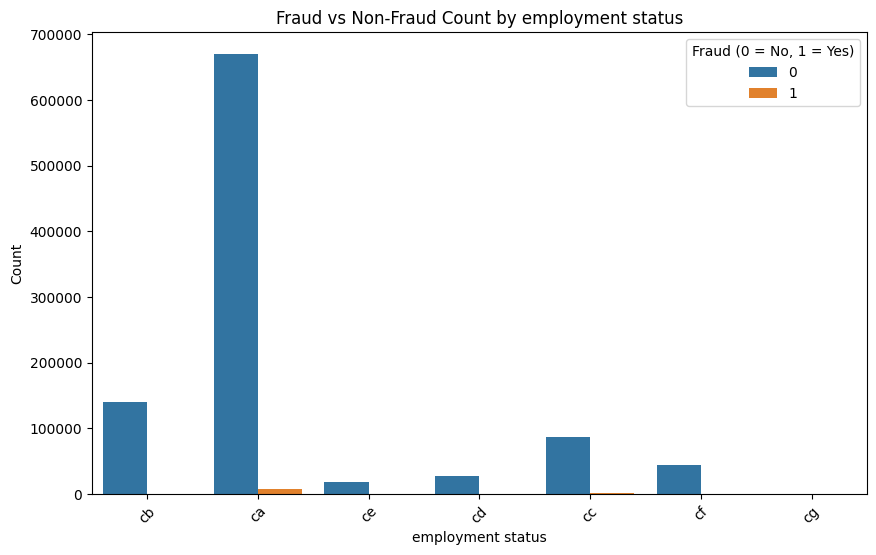

In [50]:

plt.figure(figsize=(10, 6))
sns.countplot(x='employment_status', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by employment status')
plt.xlabel('employment status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


Fraduster's predomintely employment status is ca

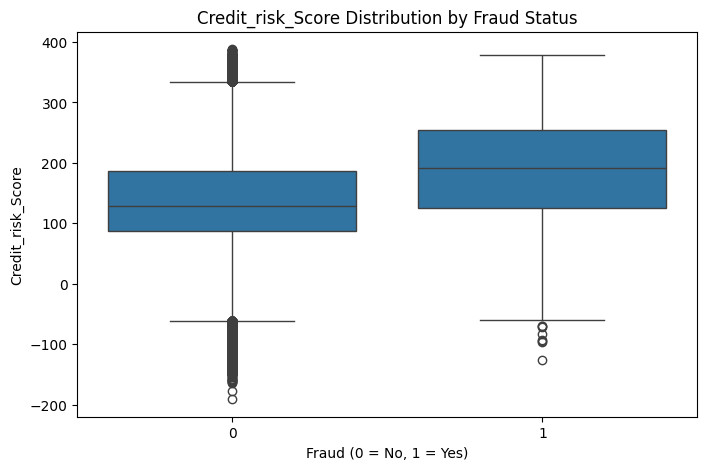

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='credit_risk_score', data=df)
plt.title('Credit_risk_Score Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Credit_risk_Score')
plt.show()

Fraudulent users don’t always have poor credit risk scores — they can actually score higher.

This may imply:

Fraudulent activity from users who look trustworthy on paper.

Potential synthetic identities or gaming of scoring models.


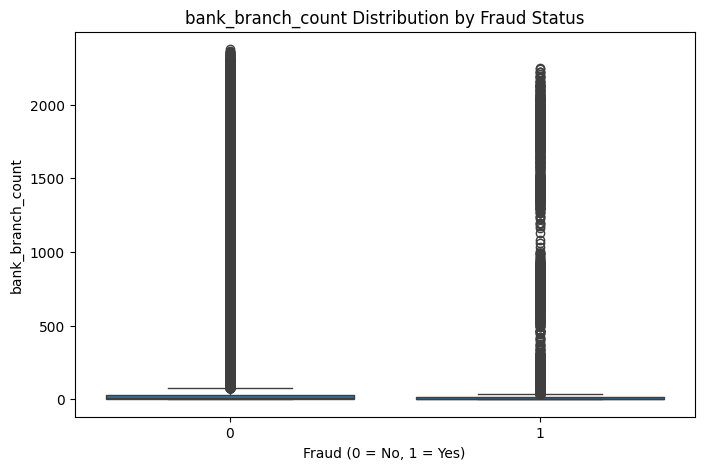

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='bank_branch_count_8w', data=df)
plt.title('bank_branch_count Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('bank_branch_count')
plt.show()

Fraudsters tend to:

Use fewer branches

Be more uniform in their behavior

Possibly rely on online-only access or one-time activity

In [55]:
df['housing_status'] = df['housing_status'].str.lower().str.strip()

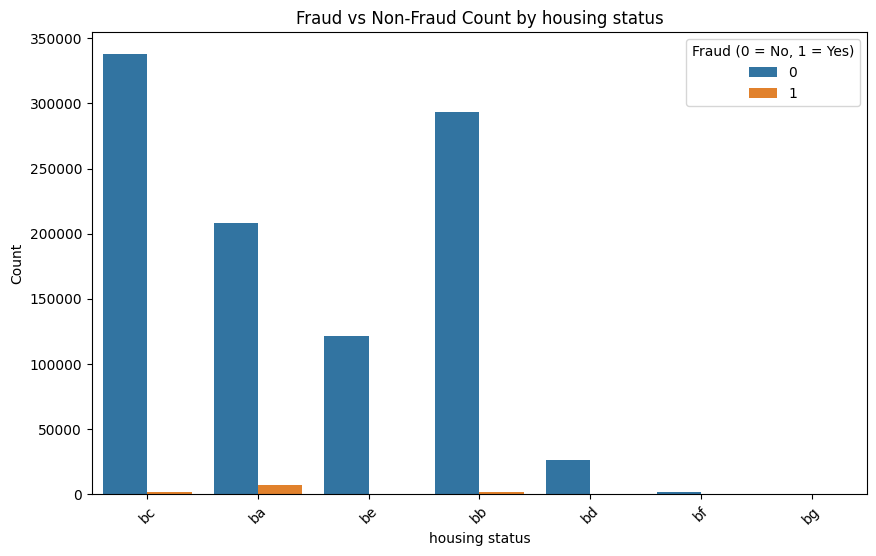

In [56]:

plt.figure(figsize=(10, 6))
sns.countplot(x='housing_status', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by housing status')
plt.xlabel('housing status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


Most fraudstars have ba housing status

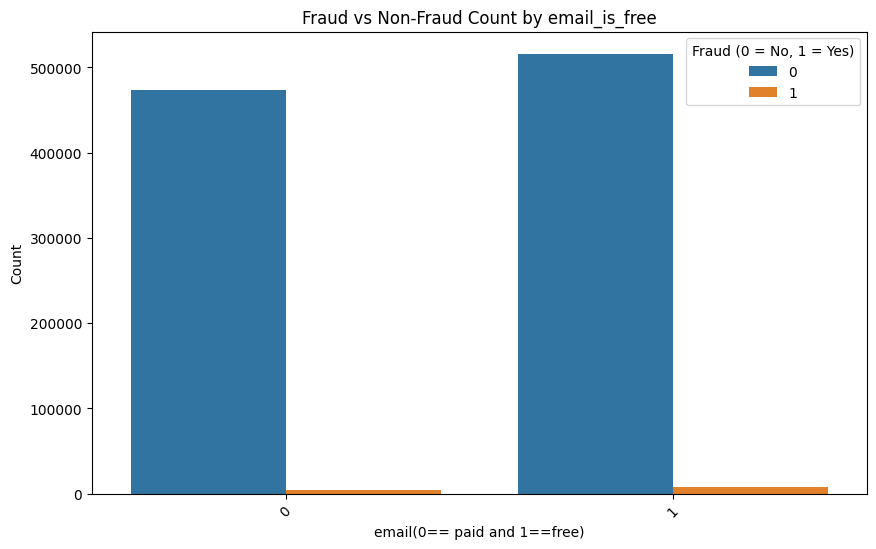

In [57]:

plt.figure(figsize=(10, 6))
sns.countplot(x='email_is_free', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by email_is_free')
plt.xlabel('email(0== paid and 1==free)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


Most fraudstars use free email domain
This is might so because they can easily move on to new free domain. So it implies free domain are more vulnurable

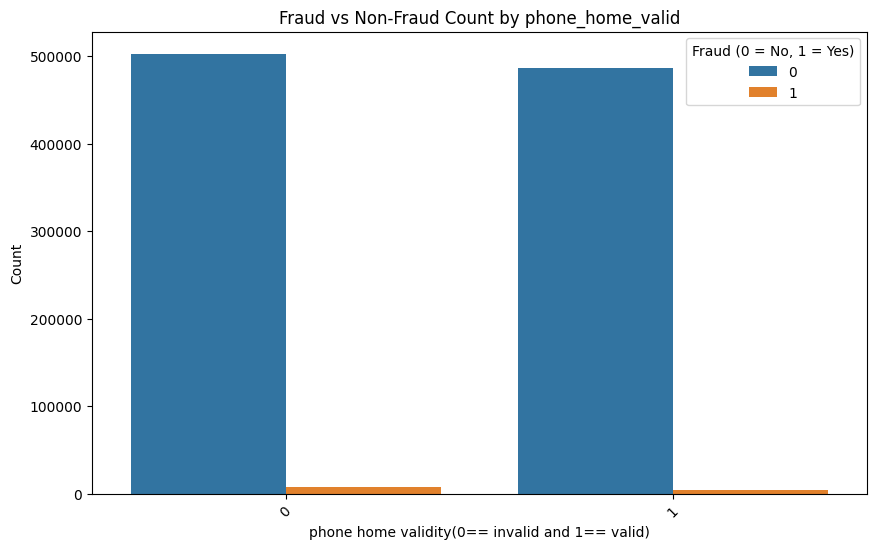

In [58]:

plt.figure(figsize=(10, 6))
sns.countplot(x='phone_home_valid', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by phone_home_valid')
plt.xlabel('phone home validity(0== invalid and 1== valid)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


It is obvious most fraudsters use invalid phone numbers.

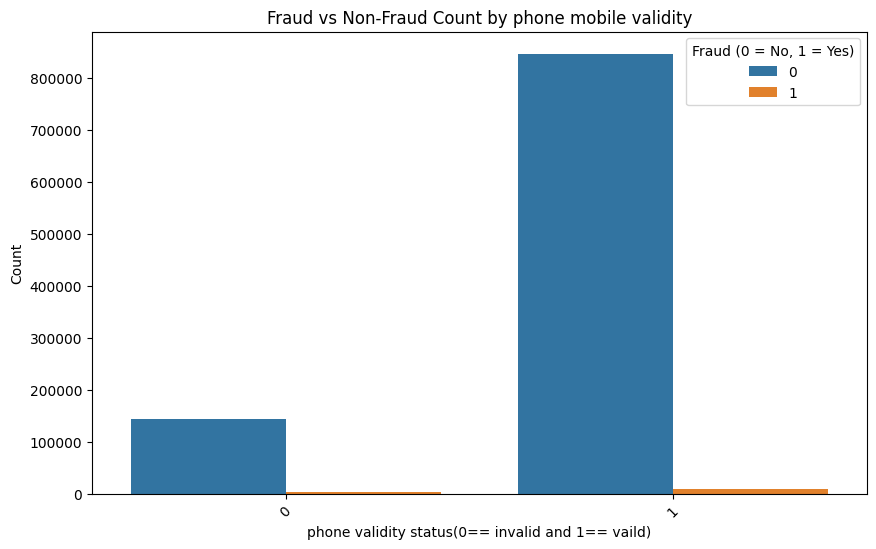

In [59]:

plt.figure(figsize=(10, 6))
sns.countplot(x='phone_mobile_valid', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by phone mobile validity')
plt.xlabel('phone validity status(0== invalid and 1== vaild)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


mobile phone validity ensure fraudsters for smooth communication with victim.

In [60]:
import numpy as np

# Replace -1 with NaN (missing)
df['bank_months_count'] = df['bank_months_count'].replace(-1, np.nan)

# Optionally fill NaNs with median or 0 (your choice based on context)
df['bank_months_count'].fillna(df['bank_months_count'].median(), inplace=True)


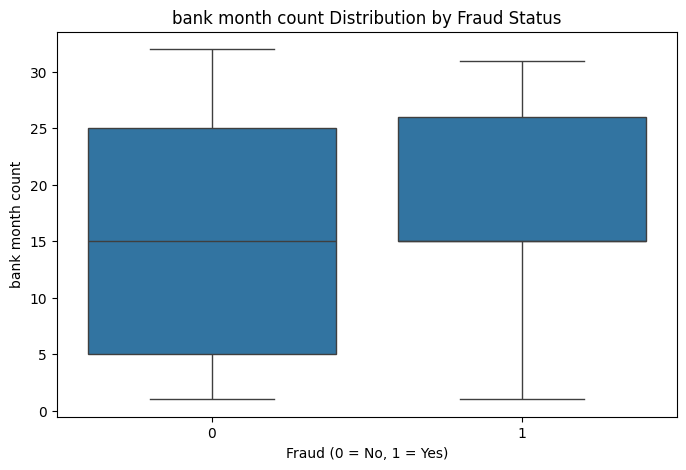

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='bank_months_count', data=df)
plt.title('bank month count Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('bank month count')
plt.show()

this show most fraudsters uses mutiple bank account. Our analysis clearly suggsts that trend is change the bank not branch to escape from bank's fraud algoritms


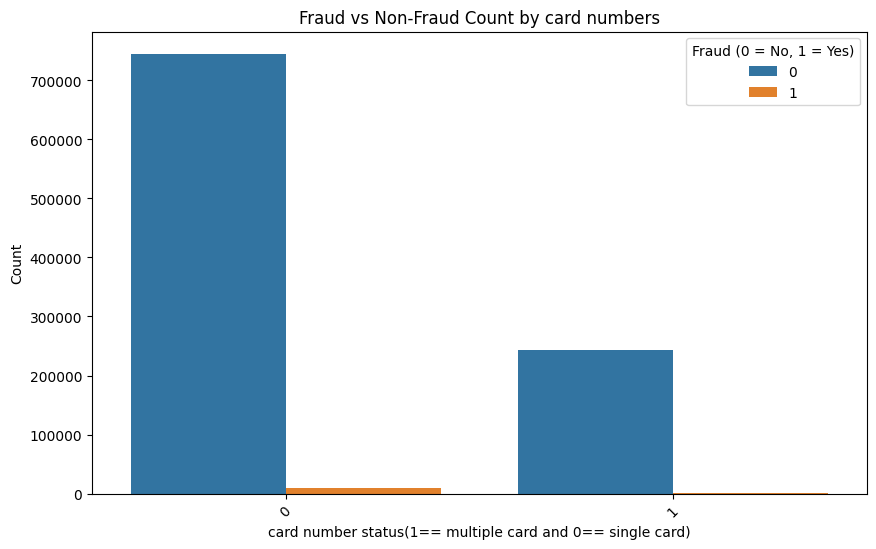

In [62]:

plt.figure(figsize=(10, 6))
sns.countplot(x='has_other_cards', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by card numbers')
plt.xlabel('card number status(1== multiple card and 0== single card)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()


It indicates fraudsters work on similiar pattern they only have single card

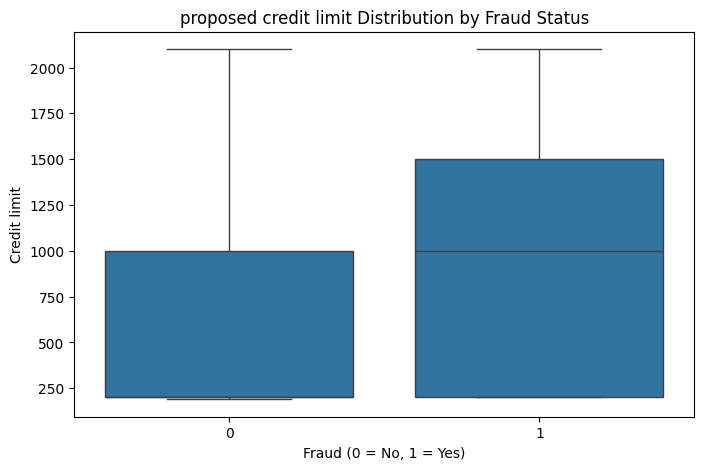

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='proposed_credit_limit', data=df)
plt.title('proposed credit limit Distribution by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Credit limit')
plt.show()

Fraudsters have high proposed credit limits

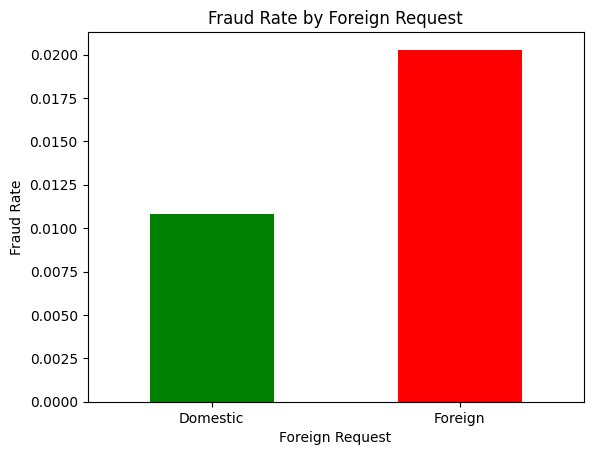

In [65]:
fraud_rate = df.groupby('foreign_request')['fraud_bool'].mean()
fraud_rate.plot(kind='bar', title='Fraud Rate by Foreign Request', color=['green', 'red'])
plt.xlabel('Foreign Request')
plt.ylabel('Fraud Rate')
plt.xticks([0, 1], ['Domestic', 'Foreign'], rotation=0)
plt.show()

if a user engage in more foriegn transaction have higher possibilities of fraudster

In [66]:
df['source'] = df['source'].str.lower().str.strip()

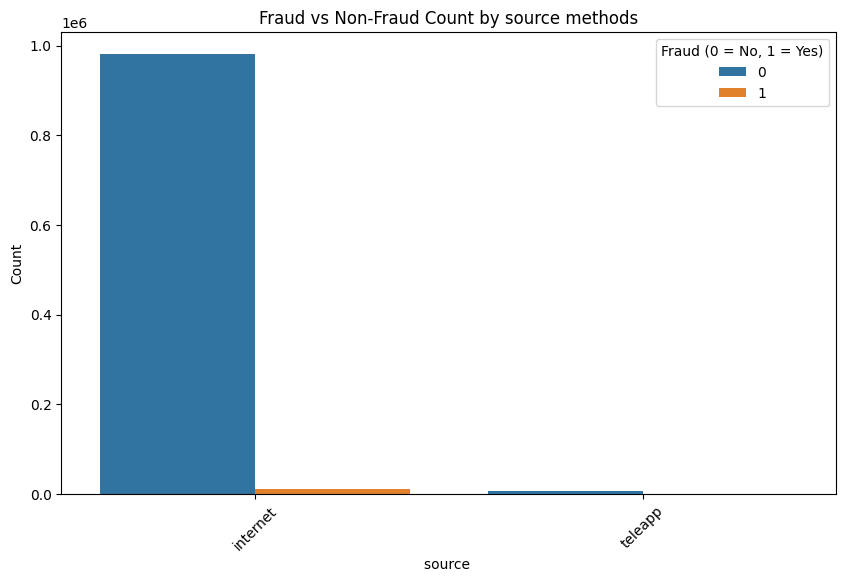

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='source', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by source methods')
plt.xlabel('source ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()

As now-a-days most people uses internet so fraudsters too have use internet to pick their victim

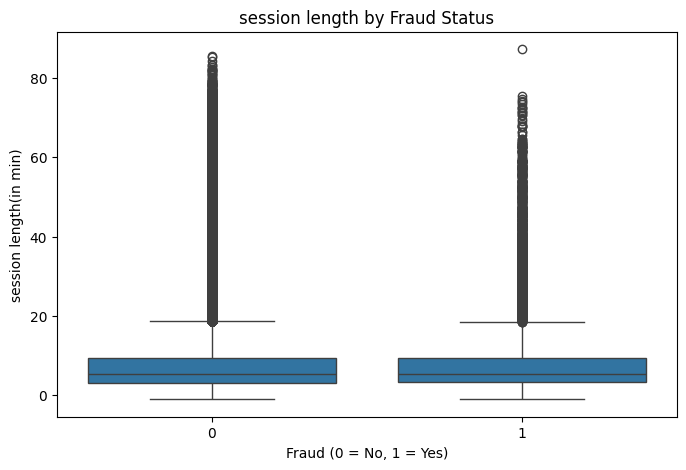

In [69]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_bool', y='session_length_in_minutes', data=df)
plt.title('session length by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('session length(in min)')
plt.show()

Fraudsters uses mostly low session length because to escape from algo to find thier location at that time

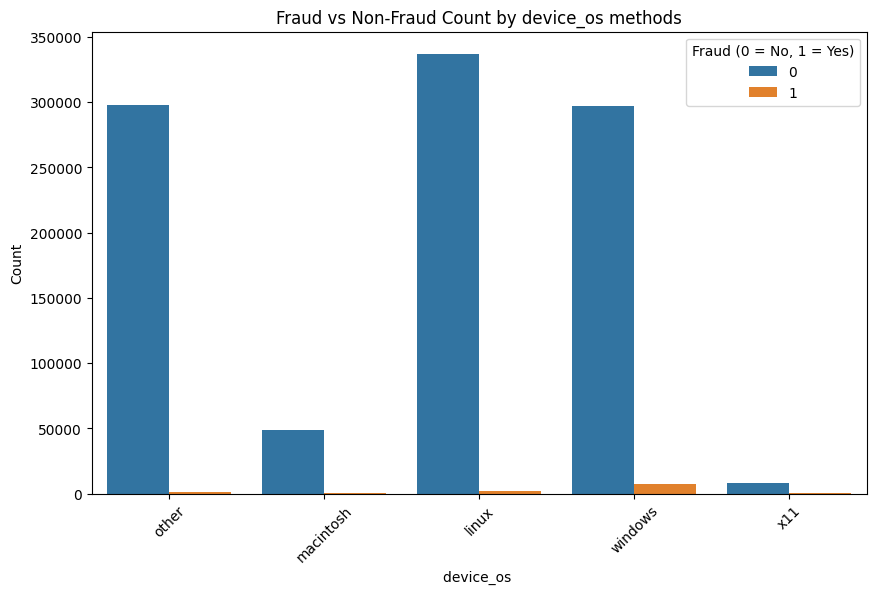

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='device_os', hue='fraud_bool', data=df)
plt.title('Fraud vs Non-Fraud Count by device_os methods')
plt.xlabel('device_os ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud (0 = No, 1 = Yes)')
plt.show()

most Fraudsters uses windows

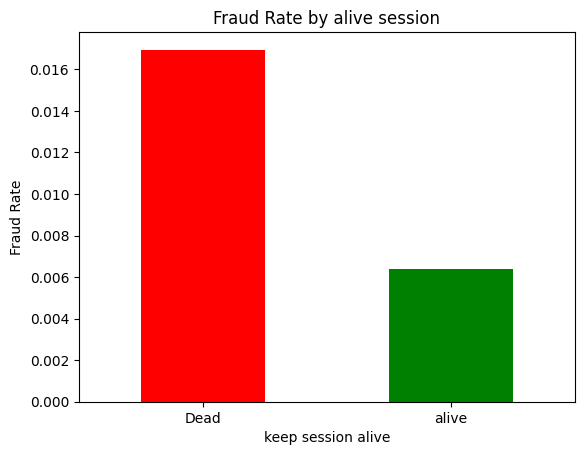

In [73]:
fraud_rate = df.groupby('keep_alive_session')['fraud_bool'].mean()
fraud_rate.plot(kind='bar', title='Fraud Rate by alive session', color=['red', 'green'])
plt.xlabel('keep session alive')
plt.ylabel('Fraud Rate')
plt.xticks([0, 1], ['Dead', 'alive'], rotation=0)
plt.show()

mostly fraudsters uses Dead sessions to escape from police.

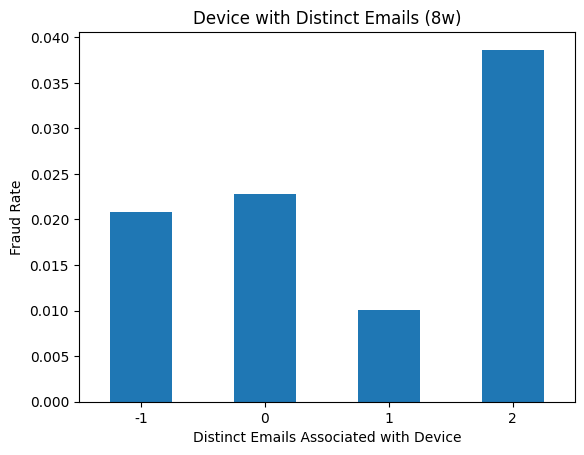

In [78]:
fraud_rate.plot(kind='bar', title='Device with Distinct Emails (8w)')
plt.xlabel('Distinct Emails Associated with Device')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()


devices with 2 distinct emails address has more chance of fraud

one interpretation is that no one use a device which have fraud count so it's maen that fraudsters change their devices after every fraud.

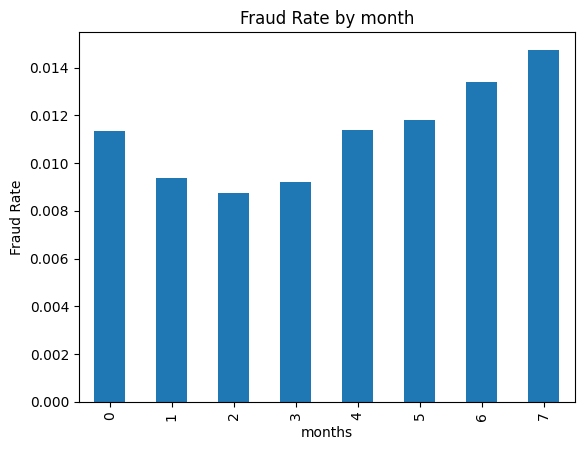

In [80]:
fraud_rate = df.groupby('month')['fraud_bool'].mean()
fraud_rate.plot(kind='bar', title='Fraud Rate by month')
plt.xlabel('months')
plt.ylabel('Fraud Rate')
plt.show()

month of 7 has high probability for fraud